<h1><center>Imports</center></h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

from sklearn.preprocessing import OneHotEncoder
import h5py

In [2]:
%%capture
import import_ipynb
import Create_non_digit_data

In [3]:
# allows matplotlib plots to show on page
%matplotlib inline

<h1><center>Functions</center></h1>

In [4]:
def get_data(file):
    '''
    gets data from .mat file
    '''
    data = loadmat(file)
    X = data['X']
    y = data['y']
    print(type(X))
    return(X, y)

In [5]:
def get_non_digit_data():
    '''
    gets non-digit containing data
    '''
    X, y = Create_non_digit_data.make_non_digit_examples()
#     print(len(X))
#     print(len(y))
    return(X, y)

In [6]:
def show_img(img, label):
    '''
    shows 1 image
    '''
    fig, ax = plt.subplots(1, 1)
    if img.shape[2] == 1: # grayscale
        ax.imshow(img[:,:,0], cmap='gray')
    elif img.shape[2] == 3: # color
        ax.imshow(img)
    else:
        print('An issue occured. img.shape: {}'.format(img.shape))
    ax.set_xticks([]); ax.set_yticks([])
    ax.set_title(label)

In [7]:
def rgb2gray(imgs):
    '''
    turns rgb images to grayscale
    '''
    imgs_gray = np.expand_dims(np.dot(imgs, [0.2990, 0.5870, 0.1140]), axis=3)
    return(imgs_gray)

In [8]:
def plot_distribution(train, val, test):
    '''
    plots the distribution of labels in the data set
    '''
    plt.figure(figsize=(20, 10))
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

    fig.suptitle('Class Distribution', fontsize=14, fontweight='bold', y=1.05)
    

    ax1.hist(y_train, bins=10)
    ax1.set_title("Training set")
    
    ax2.hist(y_val, color='r', bins=10)
    ax2.set_title("Validation set")

    ax3.hist(y_test, color='g', bins=10)
    ax3.set_title("Test set")

    fig.tight_layout()

<h1><center>In Line Code</center></h1>

<h2>Part 1: Get digit containing data</h2>

In [9]:
X_train, y_train = get_data('training_images/train_32x32.mat')
y_train[y_train == 10] = 0
print('(old) X_train: {}, y_train: {}'.format(X_train.shape, y_train.shape))
X_train, y_train = X_train.transpose((3,0,1,2)), y_train[:,0]

# (num_images, num_rows, num_cols, num_colors)
print('(new) X_train: {}, y_train: {}'.format(X_train.shape, y_train.shape))

# show_img(X_train[0], y_train[0])

print(X_train.shape)

<class 'numpy.ndarray'>
(old) X_train: (32, 32, 3, 73257), y_train: (73257, 1)
(new) X_train: (73257, 32, 32, 3), y_train: (73257,)
(73257, 32, 32, 3)


In [10]:
X_test, y_test = get_data('training_images/test_32x32.mat')
y_test[y_test == 10] = 0
print('(old) X_test: {}, y_test: {}'.format(X_test.shape, y_test.shape))
X_test, y_test = X_test.transpose((3,0,1,2)), y_test[:,0]

# (num_images, num_rows, num_cols, num_colors)
print('(new) X_test: {}, y_test: {}'.format(X_test.shape, y_test.shape))

# show_img(X_test[0], y_test[0])

<class 'numpy.ndarray'>
(old) X_test: (32, 32, 3, 26032), y_test: (26032, 1)
(new) X_test: (26032, 32, 32, 3), y_test: (26032,)


<h2>Part 2: Convert digit containing data to (num_imgs, 32, 32, 1)</h2>

In [11]:
print('X_train: {}, X_test: {}'.format(X_train.shape, X_test.shape))
X_train_gray = rgb2gray(X_train).astype(np.float32)
X_test_gray = rgb2gray(X_test).astype(np.float32)
print('X_train_gray: {}, X_test_gray: {}'.format(X_train_gray.shape, X_test_gray.shape))

X_train: (73257, 32, 32, 3), X_test: (26032, 32, 32, 3)
X_train_gray: (73257, 32, 32, 1), X_test_gray: (26032, 32, 32, 1)


<h2>Part 3: Get data not containing digits</h2>

In [12]:
X_non_digits, y_non_digits = get_non_digit_data()
print('X_non_digits.shape:', X_non_digits.shape)
print('y_non_digits.shape:', y_non_digits.shape)

per_train = int(0.73*len(y_non_digits))
X_non_digits_train = X_non_digits[:per_train]
y_non_digits_train = y_non_digits[:per_train]
X_non_digits_test = X_non_digits[per_train:]
y_non_digits_test = y_non_digits[per_train:]
print()
print('X_non_digits_train.shape', X_non_digits_train.shape)
print('y_non_digits_train.shape', y_non_digits_train.shape)
print('X_non_digits_test.shape', X_non_digits_test.shape)
print('y_non_digits_test.shape', y_non_digits_test.shape)

X_non_digits.shape: (5905, 32, 32, 1)
y_non_digits.shape: (5905,)

X_non_digits_train.shape (4310, 32, 32, 1)
y_non_digits_train.shape (4310,)
X_non_digits_test.shape (1595, 32, 32, 1)
y_non_digits_test.shape (1595,)


<h2>Part 4: Combine datasets</h2>

In [13]:
X_train = np.concatenate((X_train_gray, X_non_digits_train))
y_train = np.concatenate((y_train, y_non_digits_train))
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)

X_test = np.concatenate((X_test_gray, X_non_digits_test))
y_test = np.concatenate((y_test, y_non_digits_test))
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (77567, 32, 32, 1)
y_train: (77567,)
X_test: (27627, 32, 32, 1)
y_test: (27627,)


<h2>Part 5: Shuffle datasets</h2>

In [14]:
train_index_length = X_train.shape[0]
test_index_length = X_test.shape[0]

In [15]:
train_index = np.arange(train_index_length)
np.random.shuffle(train_index)
test_index = np.arange(test_index_length)
np.random.shuffle(test_index)

In [16]:
X_train_shuffled = X_train[train_index]
y_train_shuffled = y_train[train_index]

X_test_shuffled = X_train[test_index]
y_test_shuffled = y_train[test_index]

<h2>Part 6: Split training data into training and validation</h2>

In [17]:
print('X_train:', X_train.shape, 'y_train:', y_train.shape)

X_train: (77567, 32, 32, 1) y_train: (77567,)


In [18]:
split_index = int((0.15)*X_train.shape[0])
print('split_index:', split_index)

split_index: 11635


In [19]:
X_train = X_train_shuffled[split_index:]
y_train = y_train_shuffled[split_index:]

X_val = X_train_shuffled[:split_index]
y_val = y_train_shuffled[:split_index]
print('X_train.shape', X_train.shape, 'y_train.shape', y_train.shape)
print('X_val.shape', X_val.shape, 'y_val.shape', y_val.shape)

X_train.shape (65932, 32, 32, 1) y_train.shape (65932,)
X_val.shape (11635, 32, 32, 1) y_val.shape (11635,)


<h2>Part 7: Check data distribution</h2>

<Figure size 1440x720 with 0 Axes>

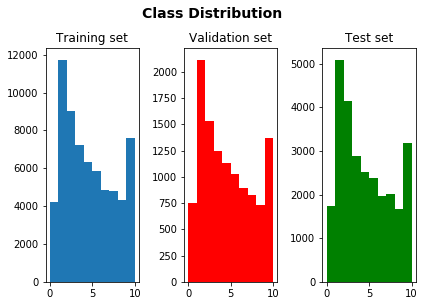

In [20]:
plot_distribution(y_train, y_val, y_test)

<h2>Part 8: Normalize data</h2>

In [21]:
# print('max(X_train_gray[0]): {}'.format(np.max(X_train_gray[0])))
# print('min(X_train_gray[0]): {}'.format(np.min(X_train_gray[0])))

# train_mean = np.mean(X_train_gray, axis=0)
# train_std = np.std(X_train_gray, axis=0)
# print(train_mean[0][0])

# test_mean = np.mean(X_test_gray, axis=0)
# test_std = np.std(X_test_gray, axis=0)

# X_train_gray = (X_train_gray - train_mean) / train_std
# X_test_gray = (X_test_gray - test_mean) / test_std
# print('max(X_train_gray[0]): {}'.format(np.max(X_train_gray[0])))
# print('min(X_train_gray[0]): {}'.format(np.min(X_train_gray[0])))

<h2>Part 9: Change data format to OHE</h2>

In [22]:
# # OHE = OneHotEncoder().fit(y_train.reshape(-1, 1))
# print(np.unique(y_train))
# # y_train = OHE.transform(y_train.reshape(-1, 1)).toarray()
# # y_test = OHE.transform(y_test.reshape(-1, 1)).toarray()
# print(np.unique(y_train))
# print(np.unique(y_test))

<h2>Part 10: Save data</h2>

In [23]:
print('Storing data')
# Create file
h5f = h5py.File('prepare_data.h5', 'w')

# Store the datasets
h5f.create_dataset('X_train', data=X_train)
h5f.create_dataset('y_train', data=y_train)
h5f.create_dataset('X_val', data=X_val)
h5f.create_dataset('y_val', data=y_val)
h5f.create_dataset('X_test', data=X_test)
h5f.create_dataset('y_test', data=y_test)

Storing data


<HDF5 dataset "y_test": shape (27627,), type "<i4">

In [24]:
print('columns in "h5f":', list(h5f.keys()))

columns in "h5f": ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


In [25]:
# Close the file
h5f.close()
print('Data storage complete')

Data storage complete
